In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('city_day.csv')
df.fillna(method='ffill', inplace=True)
df.dropna(subset=['PM2.5', 'PM10', 'AQI', 'AQI_Bucket', 'NH3'], inplace=True)

In [3]:
print(df.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  22137.000000  22137.000000  22137.000000  22137.000000  22137.000000   
mean      64.715037     99.773538     17.145885     25.615913     33.544421   
std       64.432121     87.778628     23.677847     19.768280     35.316949   
min        0.160000      0.210000      0.020000      0.010000      0.000000   
25%       30.060000     32.250000      6.050000     11.930000     13.920000   
50%       46.040000     72.380000      9.200000     19.480000     21.610000   
75%       74.550000    129.710000     17.570000     33.940000     39.160000   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  22137.000000  22137.000000  22137.000000  22137.000000  22137.000000   
mean      24.633772      1.168909     12.117847     33.826262      2.832127   
std       28.970989      1.993067     15.794932    

In [4]:
correlation_matrix = df.corr()
relevant_features = correlation_matrix['AQI'].abs().sort_values(ascending=False).index[1:]
print(relevant_features)

Index(['PM2.5', 'PM10', 'NO2', 'NO', 'NOx', 'Toluene', 'O3', 'CO', 'SO2',
       'Xylene', 'NH3', 'Benzene'],
      dtype='object')


<ipython-input-4-7726e2dc45ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


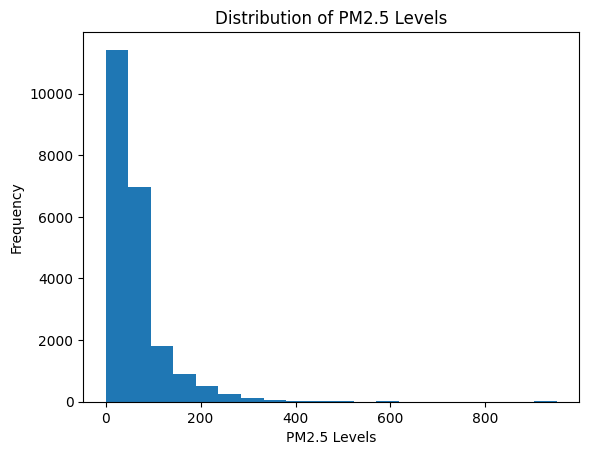

In [5]:
plt.hist(df['PM2.5'], bins=20)
plt.xlabel('PM2.5 Levels')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Levels')
plt.show()

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [7]:
X = df[relevant_features]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
print(f"Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lr):.2f}, MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}, R-squared: {r2_score(y_test, y_pred_lr):.2f}")
print(f"Random Forest - MSE: {mean_squared_error(y_test, y_pred_rf):.2f}, MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}, R-squared: {r2_score(y_test, y_pred_rf):.2f}")

Linear Regression - MSE: 2235.39, MAE: 30.29, R-squared: 0.78
Random Forest - MSE: 975.23, MAE: 17.23, R-squared: 0.90


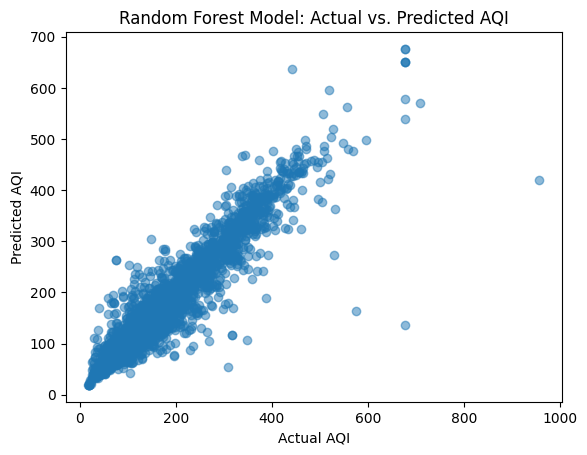

In [10]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Random Forest Model: Actual vs. Predicted AQI')
plt.show()